#### Partisan Topics Text Analysis

This data originally appeared in Gentzkow and Shapiro (GS; 2010) and considers text of the 2005 Congressional Record, containing all speeches in that year for members of the United States House and Senate. In particular, GS record the number times each of 529 legislators used terms in a list of 1000 phrases. It also includes the ideology of each speaker –  Party: (Republican, Democrat, or Independent)  

The objective of this project is to 
- Implement K-means methods and topic models to cluster text and interpret topics
- Built and compared multiple topic regression models to predict party membership from text clusters

In [1]:
library(glmnet)
library(Matrix)
library(textir)
library(maptpx)
library(dplyr)
library(tidyr)
library(wordcloud)
library(rddtools)

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loaded glmnet 3.0-2

Warning message:
"package 'textir' was built under R version 3.6.2"Loading required package: distrom
Warning message:
"package 'distrom' was built under R version 3.6.2"Loading required package: gamlr
Warning message:
"package 'gamlr' was built under R version 3.6.2"Loading required package: parallel
Warning message:
"package 'maptpx' was built under R version 3.6.2"Loading required package: slam
Warning message:
"package 'slam' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following object is masked from 'package:distrom':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'tidyr'

The following objects are masked from 'package:Mat

In [2]:
load("C:/Users/boyas/Documents/UCDavisMSBA/Courses/Winter/ML/hw5/congress.RData")

#### Part 1 K-means
- Fit K-means to cluster the speech text of the members, comprising of the 1000 phrases (Try K in 5,10,15,20,25)
- Use AICc and elbow curve method to identify the most optimal value of K

In [3]:
fs <- scale(as.matrix(congress109Counts/rowSums(congress109Counts)))
kmfs5 <- kmeans(fs,5)        
kmfs10 <- kmeans(fs,10)  
kmfs15 <- kmeans(fs,15)  
kmfs20 <- kmeans(fs,20)
kmfs25 <- kmeans(fs,25)
kcluster <- list(kmeans(fs,1),kmeans(fs,2),kmeans(fs,3),kmeans(fs,4),
                kmfs5, kmfs10, kmfs15, kmfs20, kmfs25)

In [6]:
# BIC
#kmeansBIC = function(fit){
#  m = ncol(fit$centers)
#  n = length(fit$cluster)
#  k = nrow(fit$centers)
#  D = fit$tot.withinss
#  return (D + log(n)*m*k)
#}
##(D + log(n)*df)
##df <- length(fit$centers) # K*dim
##n <- sum(fit$size)

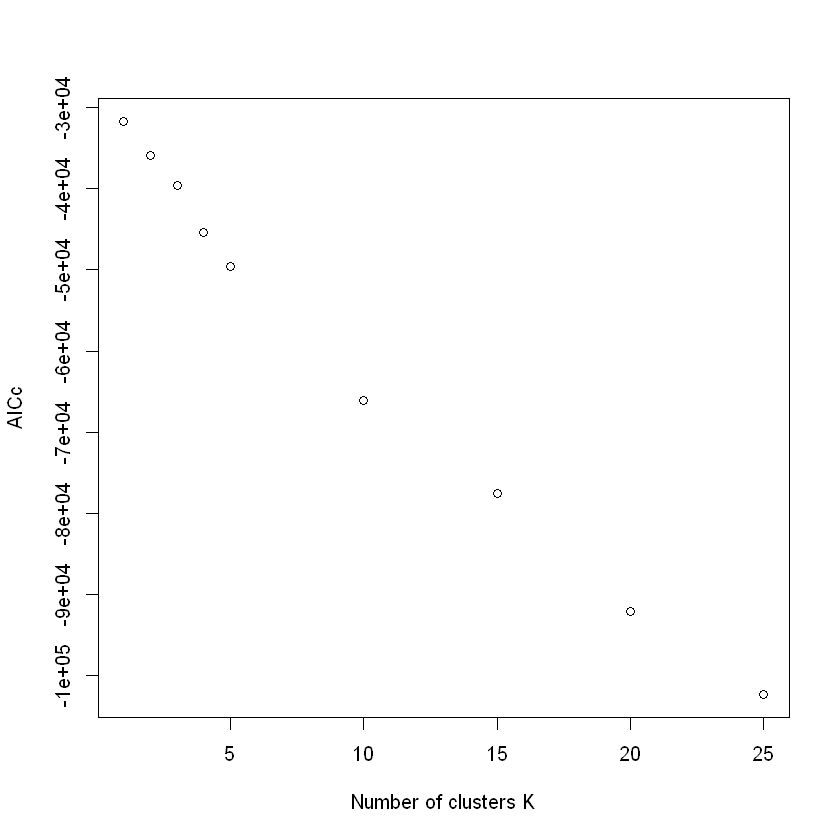

In [4]:
# AICc
kmeansAICc = function(fit){
  df = length(fit$cluster)
  n <- sum(fit$size)
  D = fit$tot.withinss
  return (D + 2*df*n/(n-df-1))
}

aicc= sapply(kcluster, kmeansAICc)
plot(c(1:4,5*(1:5)), aicc, 
     xlab="Number of clusters K",
     ylab="AICc")
##k==25

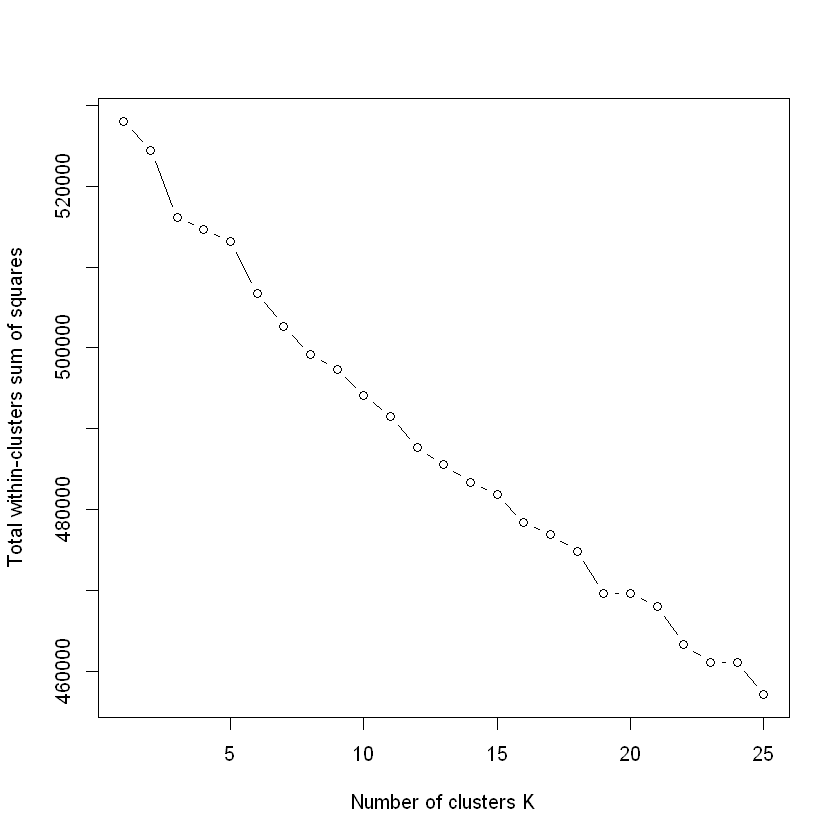

In [8]:
# Elbow curve
set.seed(123)
wss <- lapply(1:25, 
              function(k){kmeans(fs, k)$tot.withinss})
plot(1:25, wss,
     type="b",
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

##k==25

#### Part 2 Topic Models
- Use topic models(latent dirichlet allocation) to cluster speech text.
- Use Bayes factors to choose the number of topics and interpret the chosen model. (The model returns the K with lowest BIC and highest log Bayes Factor).

In [15]:
x <- as.simple_triplet_matrix(congress109Counts)
tpcs <- topics(x, K=5*(1:5), verb=10)  # it chooses 10 topics 


Estimating on a 529 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 6250.9, 5343.6, 4087.6, 3171.8, 2517.7, 1997.5, 1757.8, 1621.5, 1486.2, 1367.6, 1240.2, 1167.2, 1077.1, 999.2, 897.3, 776.3, 686.9, 634.6, 598.5, 552.6, 504.8, 468.4, 449.4, 439.9, 425.7, 436.1, 441, 427.9, 418.2, 419.2, 395.4, done. (L = -1028222.6)
log BF( 5 ) = 57506.56 [  32 steps, disp = 3.65  ]
log posterior increase: 4384.5, 2580.8, 1914.4, 1983.9, 1311.1, 1076.7, 980.4, 744.9, 567, 480.6, 404.5, 339.8, 294.9, 306.1, 327.6, 295, 272.4, 236.2, 231.8, 214.8, 188.6, 188.6, 158, 137, 131.3, 141.4, 171.3, 207.1, 200.8, 182.7, 181.8, 189.5, 190.5, 180, 161.5, 150.3, 150.1, 159.8, 169.4, 177.1, 183.3, 190.2, 197.2, 205.7, 220.6, 239, 251.5, 262.4, 249, 230.1, 248.6, 267.5, 233.1, 203, 189.6, 212.5, 243.2, 266.2, 226.7, 177.8, 154.2, 143.3, 122.8, done. (L = -991521.9)
log BF( 10 ) = 77508.5 [  64 steps, disp = 2.9  ]
log posterior increase: 3328.5, 2119.1, 1376.8, 926.6, 7

In [16]:
tpcs$theta # The composition of each of the ten topics

,1,2,3,4,5,6,7,8,9,10
gifted.talented.student,6.106580e-09,2.807175e-09,8.732176e-09,7.673126e-09,6.207497e-04,6.548186e-09,2.150572e-08,5.962403e-09,9.982102e-09,1.457420e-08
national.heritage.corridor,2.469811e-05,2.816632e-09,1.358435e-08,7.124072e-09,6.763767e-09,6.690550e-04,4.208087e-09,5.807757e-09,2.098875e-08,1.147766e-08
national.homeownership.month,6.111090e-05,2.815981e-09,7.789241e-07,1.189053e-08,5.637561e-04,8.839347e-09,5.132473e-09,5.842364e-09,7.791894e-09,1.332548e-08
near.retirement.age,6.104929e-09,2.809295e-09,9.336011e-09,6.565172e-09,6.207766e-04,6.317829e-09,4.188501e-09,5.763409e-09,7.472261e-09,1.318285e-08
personal.injury.lawyer,6.407064e-09,2.818895e-09,3.588703e-04,8.589249e-09,1.621754e-04,6.373082e-09,1.671154e-04,5.910372e-09,8.171248e-09,3.062252e-08
regional.training.cent,6.213510e-09,2.817956e-09,1.135626e-08,9.789318e-09,5.648596e-09,6.316186e-09,4.482719e-09,5.762950e-09,7.665406e-09,1.200992e-03
amnesty.illegal.alien,6.462072e-09,2.808122e-09,1.043081e-03,8.883476e-09,6.155901e-09,7.826542e-09,3.613237e-08,6.569559e-09,7.673465e-09,1.096336e-08
arm.embargo.china,7.204933e-09,2.811310e-09,1.438524e-05,2.030847e-08,9.127400e-09,7.472811e-04,2.249177e-08,6.567333e-09,8.313699e-09,1.107165e-08
flag.protection.amendment,6.714298e-09,3.038355e-09,9.563505e-04,6.550868e-05,7.321315e-09,6.703069e-09,4.879066e-09,6.190568e-09,7.642915e-09,1.797244e-08
low.cost.reliable,6.930607e-09,2.811063e-09,9.283667e-09,7.843182e-09,7.916545e-09,2.068786e-05,7.771687e-09,6.227304e-09,7.517865e-09,1.274406e-03


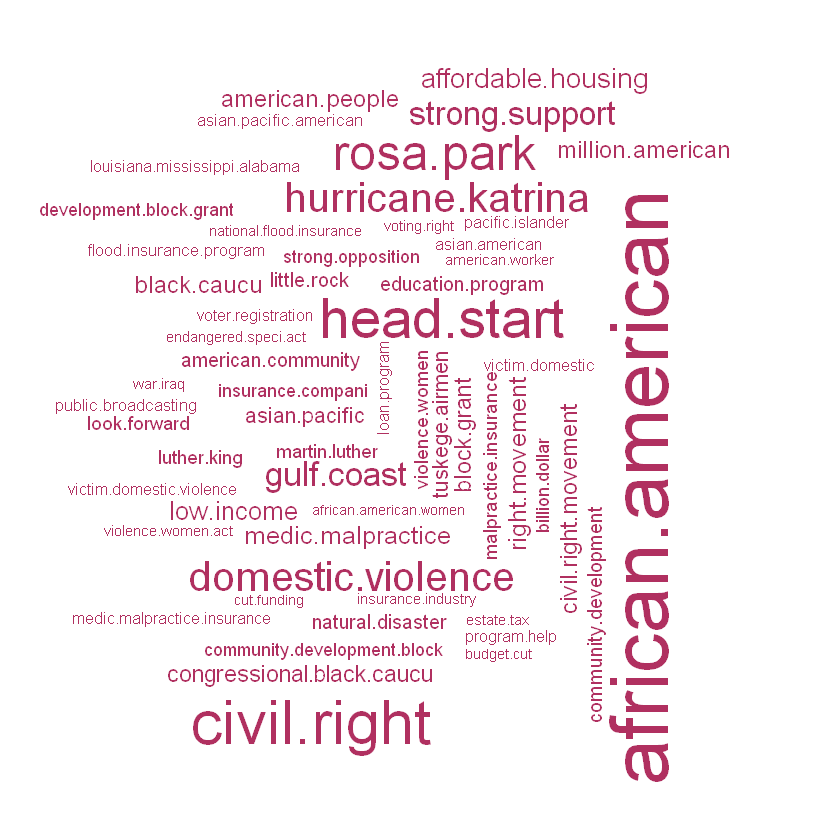

In [17]:
# Wordcloud of topic 1
wordcloud(row.names(tpcs$theta), 
          freq=tpcs$theta[,1], min.freq=0.004, col="maroon")

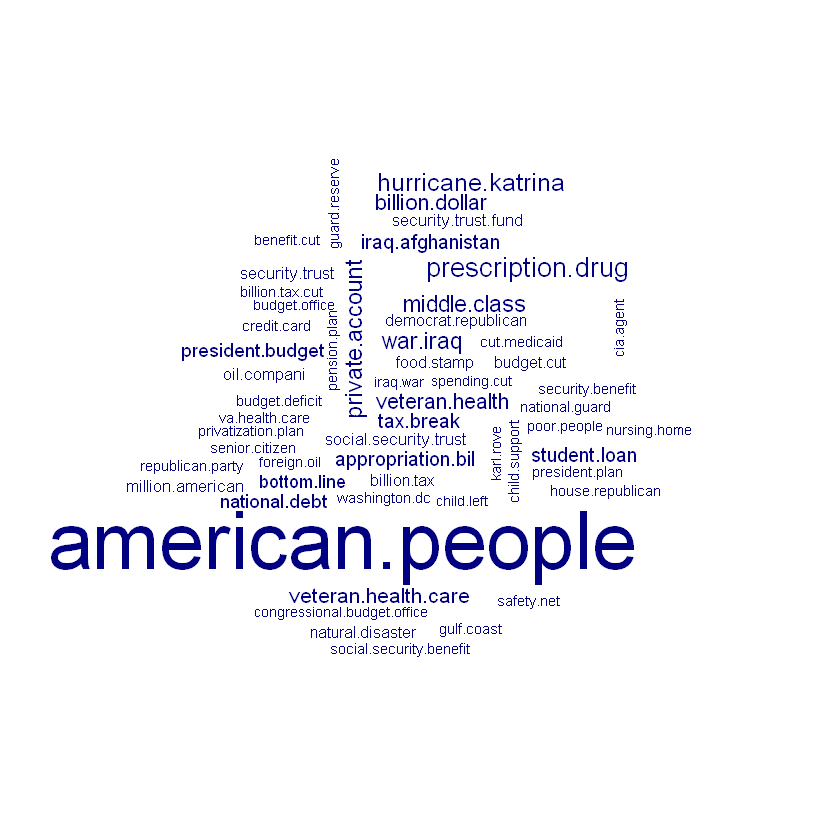

In [18]:
# Wordcloud of topic 2
wordcloud(row.names(tpcs$theta), 
          freq=tpcs$theta[,2], min.freq=0.004, col="navy")

In [19]:
# Print top ten phrases for each of ten topics
for(i in 1:10){
    cat(i, rownames(tpcs$theta)[order(tpcs$theta[,i], decreasing=TRUE)[1:5]], '\n')
    }

1 african.american civil.right head.start rosa.park domestic.violence 
2 american.people prescription.drug hurricane.katrina private.account middle.class 
3 postal.service private.property class.action illegal.alien illegal.immigration 
4 american.people appropriation.bil iraqi.people war.terror saddam.hussein 
5 tax.relief american.people economic.growth death.tax finance.committe 
6 natural.ga climate.change natural.resource foreign.oil hate.crime 
7 american.people class.action judicial.nomine chief.justice judge.robert 
8 minimum.wage credit.card low.income nuclear.weapon gun.deal 
9 trade.agreement fre.trade central.american trade.deficit american.fre.trade 
10 stem.cel natural.ga cel.research embryonic.stem embryonic.stem.cel 


#### Interpretation
Topic 01 - Civil rights <br>
Topic 02 - Health Care <br>
Topic 03 - Immigration <br>
Topic 04 - War <br>
Topic 05 - Taxes <br>
Topic 06 - Natural Resources <br>
Topic 07 - Judiciary <br>
Topic 08 - Guns and Income <br>
Topic 09 - Trade <br>
Topic 10 - Stem Cell Research

#### Part 4
- Tabulate party membership by topic clusters. 
- Fit topic regressions for party membership: predict party membership by a) topic clusters and b) phrase counts separately and compare the performance of the two models.<br>
** We use clusters generated by topic models rather than K-means to predict party membership because the former is easier to interpret, fits better according to information criteria and gives omega matrix (possibility of each observations falling in each of ten clusters) which can be directly used as independent variables. 


In [28]:
cg_std <- scale(as.matrix(congress109Counts/rowSums(congress109Counts) ))
cg <- as.simple_triplet_matrix(congress109Counts)
tpcs <- topics(cg, K=5*(1:5), verb=10)
party <- data.frame(congress109Ideology[,"party"])
rownames(party) <- rownames(congress109Ideology)


Estimating on a 529 document collection.
Fit and Bayes Factor Estimation for K = 5 ... 25
log posterior increase: 6250.9, 5343.6, 4087.6, 3171.8, 2517.7, 1997.5, 1757.8, 1621.5, 1486.2, 1367.6, 1240.2, 1167.2, 1077.1, 999.2, 897.3, 776.3, 686.9, 634.6, 598.5, 552.6, 504.8, 468.4, 449.4, 439.9, 425.7, 436.1, 441, 427.9, 418.2, 419.2, 395.4, done. (L = -1028222.6)
log BF( 5 ) = 57506.56 [  32 steps, disp = 3.65  ]
log posterior increase: 4384.5, 2580.8, 1914.4, 1983.9, 1311.1, 1076.7, 980.4, 744.9, 567, 480.6, 404.5, 339.8, 294.9, 306.1, 327.6, 295, 272.4, 236.2, 231.8, 214.8, 188.6, 188.6, 158, 137, 131.3, 141.4, 171.3, 207.1, 200.8, 182.7, 181.8, 189.5, 190.5, 180, 161.5, 150.3, 150.1, 159.8, 169.4, 177.1, 183.3, 190.2, 197.2, 205.7, 220.6, 239, 251.5, 262.4, 249, 230.1, 248.6, 267.5, 233.1, 203, 189.6, 212.5, 243.2, 266.2, 226.7, 177.8, 154.2, 143.3, 122.8, done. (L = -991521.9)
log BF( 10 ) = 77508.5 [  64 steps, disp = 2.9  ]
log posterior increase: 3328.5, 2119.1, 1376.8, 926.6, 7

In [26]:
# omega returns the possibility of each legislator's remarks falling into each cluster
p_cluster<-as.matrix(tpcs$omega)
party_p_cluster<-merge(party,p_cluster, by = "row.names")
rownames(party_p_cluster)<-party_p_cluster$Row.names
party_p_cluster<-party_p_cluster[,-1]

In [40]:
# Tabulate party membership by topic clusters.
leg_par_clu<-gather(party_p_cluster,2:11,key="cluster",value="possibility")%>%
  group_by(congress109Ideology....party..,cluster)%>%
  summarise(mean(possibility))

In [45]:
# The table below is the distribution of topic clusters for each party
# E.G: Line one indicates the possibility that speech of members from Party D falls into cluster D is 22.33%
leg_par_clu

congress109Ideology....party..,cluster,mean(possibility)
D,1,0.2233027046
D,10,0.0277578581
D,2,0.2790369746
D,3,0.0612143560
D,4,0.0742178412
D,5,0.0565986167
D,6,0.0674624492
D,7,0.0443808274
D,8,0.0957381468
D,9,0.0702902253


In [27]:
# # of observations in each party
# Too few observations of level "I"
table(party)

party
  D   I   R 
242   2 285 

In [46]:
#drop level "I"
party_p_cluster_drop_i<-party_p_cluster[which(party_p_cluster$congress109Ideology....party..!="I"),]
x_topic<-as.matrix(party_p_cluster_drop_i[,-1])
y_topic<-as.matrix(party_p_cluster_drop_i[,1])

In [55]:
# run a cv lasso model: dependent variable is categorical variable party
#                       independent variable is omega matrix(possibility of each observations falling in each of ten clusters)
regtopics.cv <- cv.glmnet(x_topic,y_topic, family="binomial")

In [56]:
# repeat the process above again, 
# this time independent variable is the frequency of each phrase occuring in each legislator's remarks
p_phrase <- data.frame(cg_std)
party_p_phrase<-merge(party,p_phrase,by="row.names")
rownames(party_p_phrase)<-party_p_phrase$Row.names
party_p_phrase<-party_p_phrase[,-1]
party_p_phrase_drop_i<-party_p_phrase[which(party_p_phrase$congress109Ideology....party..!="I"),]
x_word <-as.matrix(party_p_phrase_drop_i[,-1])
y_word <-as.matrix((party_p_phrase_drop_i[,1]))
regwords.cv <- cv.glmnet(x_word,y_word, family="binomial")

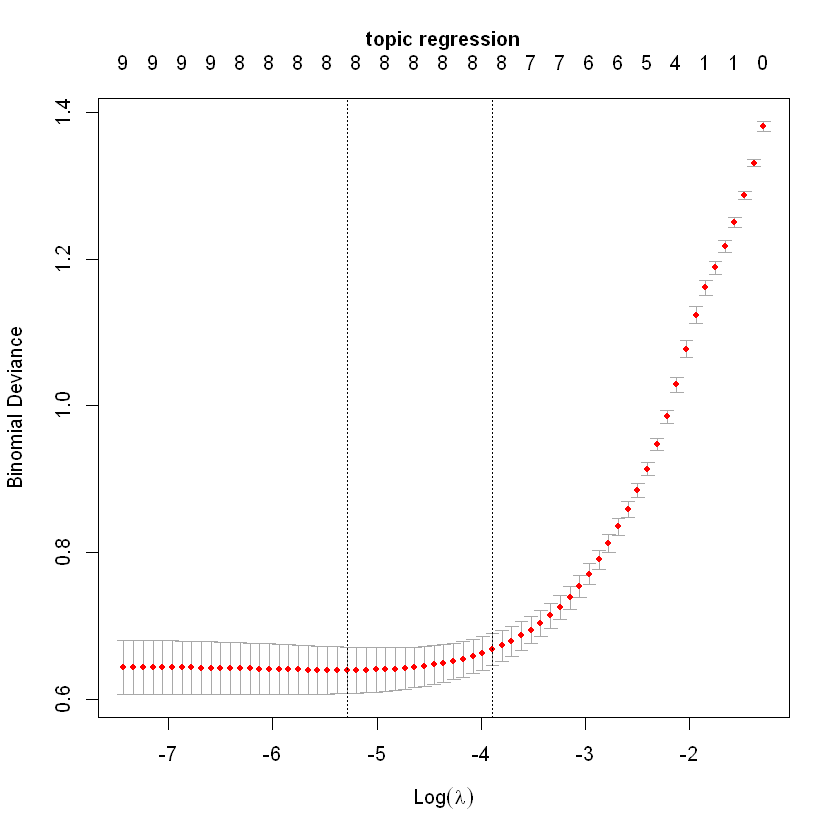

In [57]:
# compare topic regression and phrase regression
plot(regtopics.cv)
mtext("topic regression", font=2, line=2)

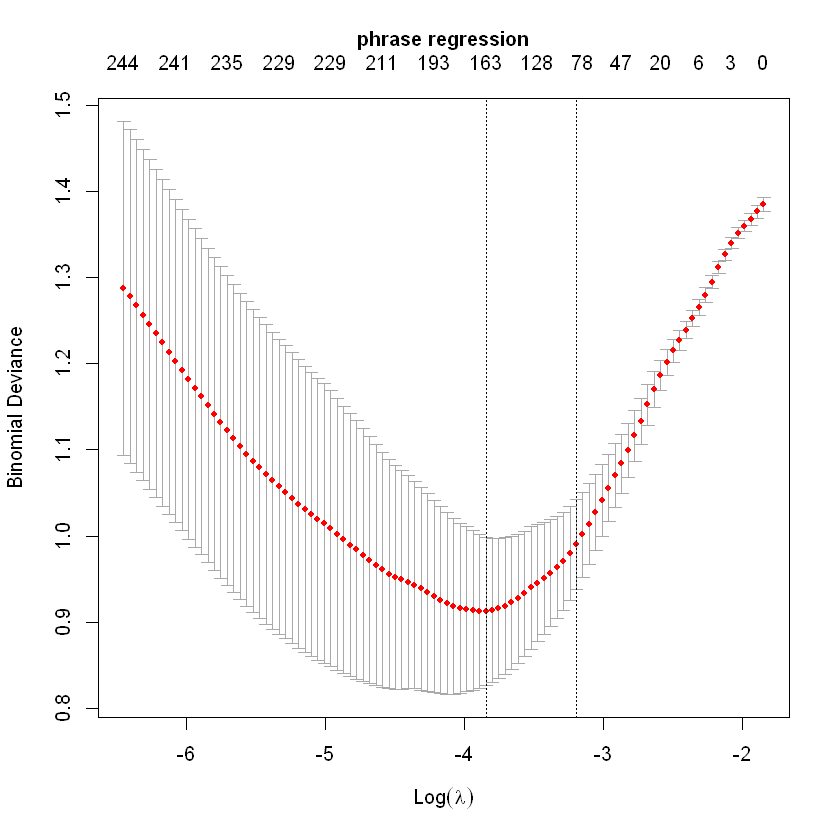

In [58]:
plot(regwords.cv)
mtext("phrase regression", font=2, line=2)

In [59]:
# max OOS R^2s
max(1-regtopics.cv$cvm/regtopics.cv$cvm[1])
max(1-regwords.cv$cvm/regwords.cv$cvm[1])
regtopics.cv
regwords.cv

[1] 0.5368702

[1] 0.3407361


Call:  cv.glmnet(x = x_topic, y = y_topic, family = "binomial") 

Measure: Binomial Deviance 

      Lambda Measure      SE Nonzero
min 0.005048  0.6396 0.03161       8
1se 0.020379  0.6677 0.02206       8


Call:  cv.glmnet(x = x_word, y = y_word, family = "binomial") 

Measure: Binomial Deviance 

     Lambda Measure      SE Nonzero
min 0.02138  0.9126 0.08625     163
1se 0.04101  0.9902 0.05203      82

#### Conclusion
We observe that the lowest deviance yielded by the phrase regression selected by cross validation is higher than that of topic regression. In addition, out-of-sample R^2 of topic model is 0.5369 higher than R^2 of phrase model which is 0.3407. 
Both indicate that topic model performs better than phrase model in predicting party membership